# FIGO Stage relationship to cell proportions in Schildkraut HGSOC

To determine whether disease progression alters the TME, we contrasted early (FIGO I–II) and advanced (III–IV) tumours via Welch t-tests on each fraction with Bonferroni correction. Advanced tumours contained fewer immune cells (mean 0.105 vs 0.129; Welch t, p-adj = 0.008) and more stromal cells (0.098 vs 0.074; p-adj= 0.033) than early-stage tumours. Adipocyte (0.134 vs 0.142) and epithelial fractions (0.663 vs 0.656) showed no stage-related difference (both p-adj = 1.0). Thus, progression to FIGO III–IV is accompanied by a modest depletion of immune infiltrate and enrichment of stromal elements, whereas adipocyte and epithelial proportions remain stable.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import sys

sys.path.insert(1, "../../")
sys.path.insert(1, "../")
sys.path.insert(1, "../../../")

import src.hp as hp

np.random.seed(88)

In [5]:
fractions = ["Adipocytes", "Immune", "Stromal", "Epithelial"]

immune_cells = [
    "B cells",
    "Mast cells",
    "T cells",
    "Monocytes",
    "Plasma cells",
    "NK cells",
    "DC",
    "pDC",
    "Macrophages",
    "ILC",
]

stromal_cells = ["Fibroblasts", "Endothelial cells"]

epi_cells = ["Epithelial cells"]

remove_unknown_stage = True

cont_cols = ["Age", "BMI"]

labels = ["Stage 1", "Stage 2", "Stage 3", "Stage 4"]
colors = ["peachpuff", "orange", "tomato", "salmon"]

## Paths

In [6]:
base_path = os.path.dirname(os.getcwd())
meta_path = os.path.join(base_path, "input_data/metadata.xlsx")

## Load InstaPrism cell-fraction tables (processed) and metadata

Proportions

In [7]:
props = pd.read_csv(
    os.path.join(base_path, "input_data/proportions_sch.csv"), index_col=0
)
props

,SampleID,Plasma cells,B cells,Endothelial cells,T cells,Monocytes,Fibroblasts,NK cells,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset,suid,ID
0,18341X10,4.919765e-49,0.052767,0.029870,1.833554e-26,1.727071e-60,7.074672e-105,8.375315e-10,0.746341,1.257780e-139,3.590420e-30,2.867046e-78,1.185148e-02,1.538137e-57,0.0,0.159171,SchildkrautB,18341X10,45369
1,18341X12,9.351753e-92,0.027159,0.011666,5.972580e-66,2.258210e-157,8.180384e-107,8.135649e-61,0.848153,3.276474e-210,2.054386e-103,1.247009e-85,2.337775e-128,1.452291e-115,0.0,0.113022,SchildkrautB,18341X12,47261
2,18341X13,6.998799e-32,0.014663,0.041547,1.004614e-23,3.232466e-34,1.225464e-02,9.550579e-19,0.819028,1.104356e-115,3.157063e-69,7.123720e-41,2.994756e-02,1.850941e-63,0.0,0.082561,SchildkrautB,18341X13,47791
3,18341X14,2.410384e-97,0.162711,0.022343,2.056824e-52,5.485488e-33,2.751866e-120,7.904174e-39,0.642545,4.774011e-154,1.326676e-75,2.334007e-77,1.516542e-02,1.488048e-80,0.0,0.157235,SchildkrautB,18341X14,47916
4,18341X15,3.439318e-76,0.050581,0.055021,5.687981e-28,5.314872e-52,8.961526e-02,2.919113e-22,0.649017,7.625379e-122,1.873123e-52,3.487465e-81,1.419715e-02,4.216693e-41,0.0,0.141568,SchildkrautB,18341X15,48002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,20160X95,1.442627e-108,0.136578,0.014420,3.410104e-30,3.267116e-82,7.666630e-23,1.501224e-35,0.710289,6.509988e-151,4.903142e-78,8.571710e-105,3.473745e-03,5.671299e-79,0.0,0.135240,SchildkrautW,20160X95,47786
584,20160X96,1.359916e-92,0.190881,0.017396,5.383974e-33,2.734703e-86,1.156925e-02,1.945285e-24,0.592805,1.063562e-147,5.374615e-82,8.551669e-96,1.270617e-02,4.370517e-04,0.0,0.174205,SchildkrautW,20160X96,47903
585,20160X97,7.862780e-79,0.102850,0.053137,8.610293e-03,1.076987e-46,4.237821e-02,1.467756e-05,0.656171,3.397744e-114,5.089409e-39,1.625064e-79,2.253584e-02,9.865474e-05,0.0,0.114204,SchildkrautW,20160X97,47926
586,20160X98,1.245316e-60,0.127050,0.034344,1.345753e-16,5.846372e-04,2.787547e-02,2.169830e-04,0.673204,4.422809e-95,4.998254e-48,3.881728e-35,5.796692e-04,4.236351e-47,0.0,0.136146,SchildkrautW,20160X98,47937


## Load survival metadata

In [8]:
renaming = hp.get_variable_renaming()
tissue_dictionary = hp.get_tissue_dictionary()

Metadata

In [9]:
meta_full = hp.open_and_clean_meta(
    meta_path=meta_path, renaming=renaming, tissue_dictionary=tissue_dictionary
)

### Build the analysis table  (clinical + cell fractions)

In [10]:
# match index in both
meta_full.index = meta_full.ID
props.index = props.ID
props.drop(columns=["ID", "SampleID", "suid"], inplace=True)

## and merge:
df = meta_full.join(props, how="inner")

cell_types = [
    col for col in df.columns if col not in meta_full.columns and col not in cont_cols
]
cell_types.remove("Dataset")

df = df[df.Stage != 9]

### Some visualization of proportions per cell type before merging

Plasma cells


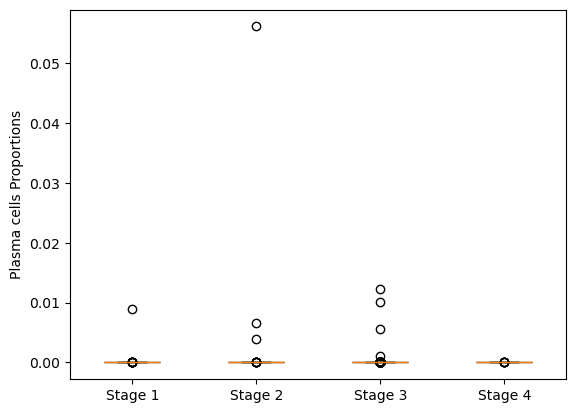

B cells


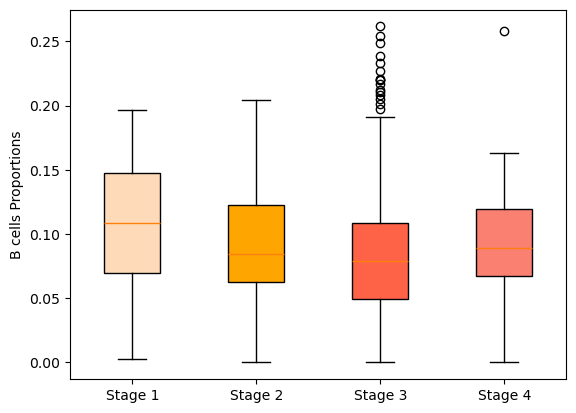

Endothelial cells


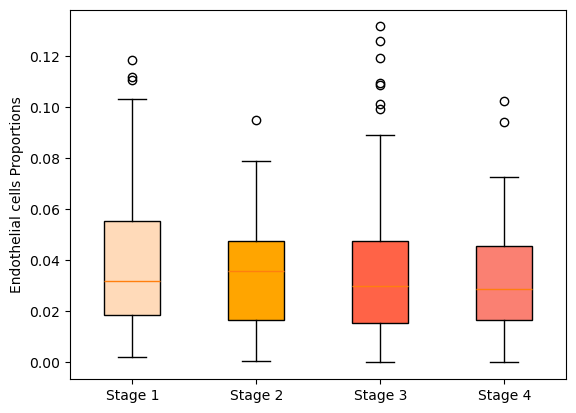

T cells


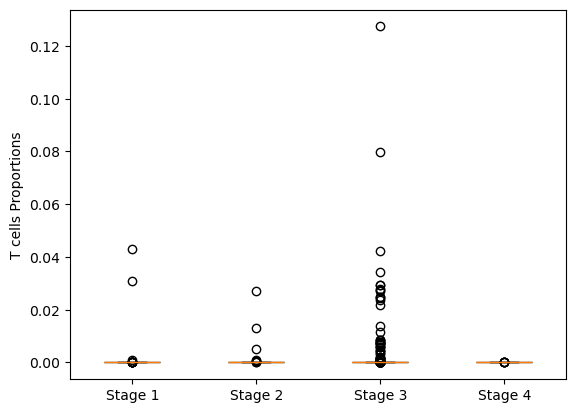

Monocytes


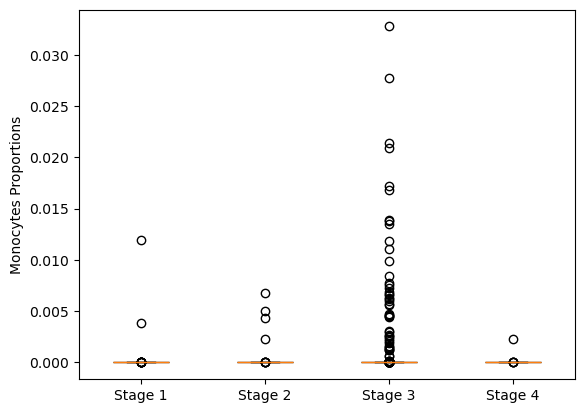

Fibroblasts


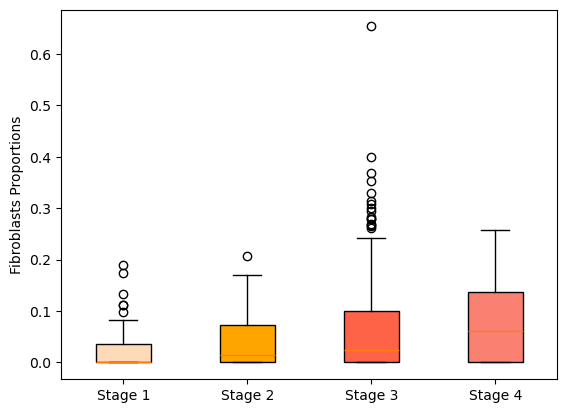

NK cells


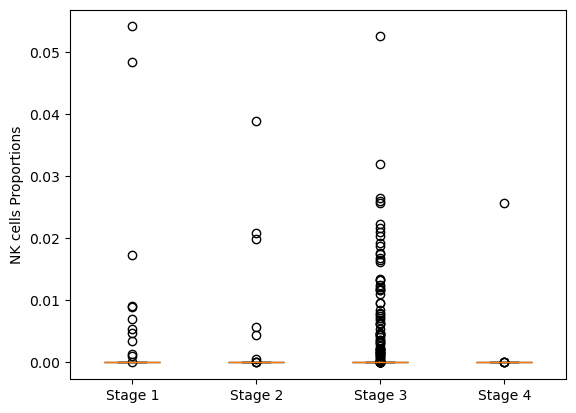

Epithelial cells


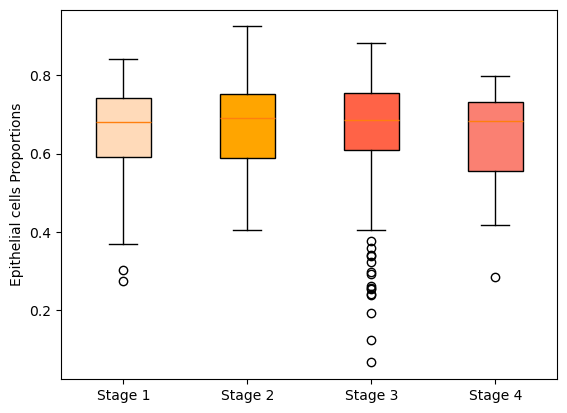

DC


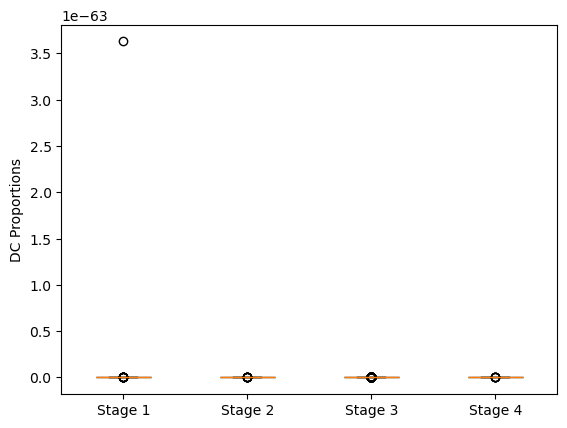

pDC


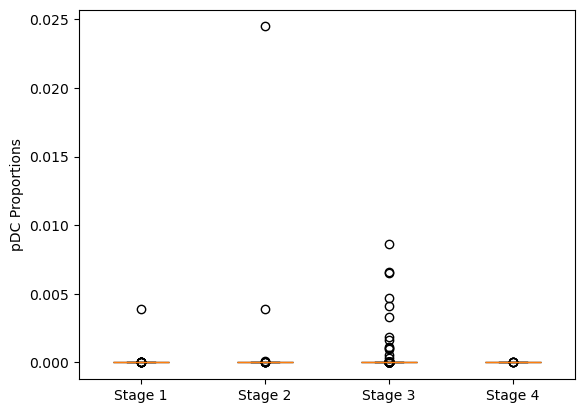

ILC


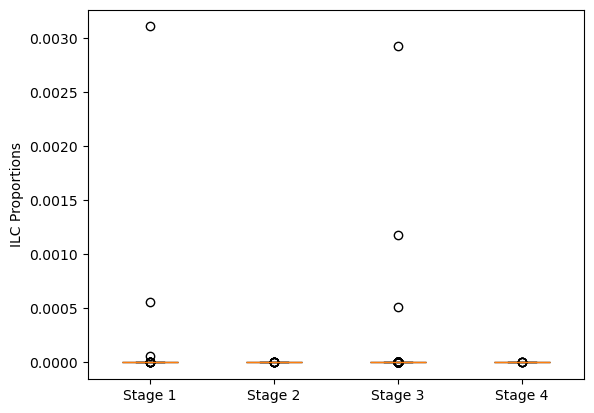

Macrophages


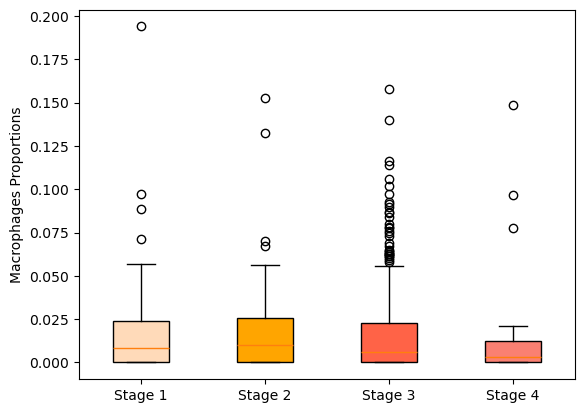

Mast cells


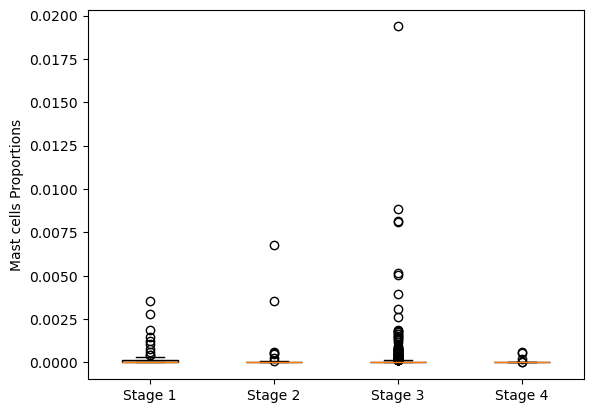

Erythroid


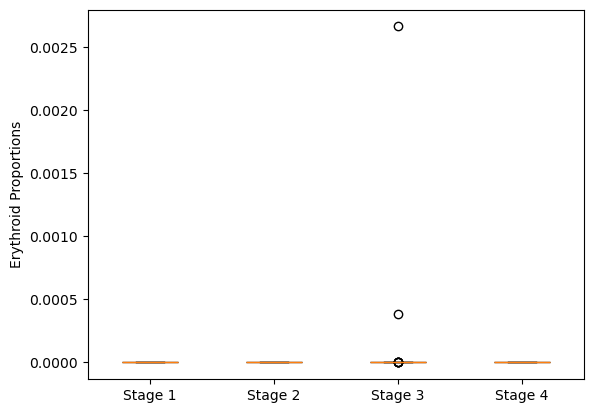

Adipocytes


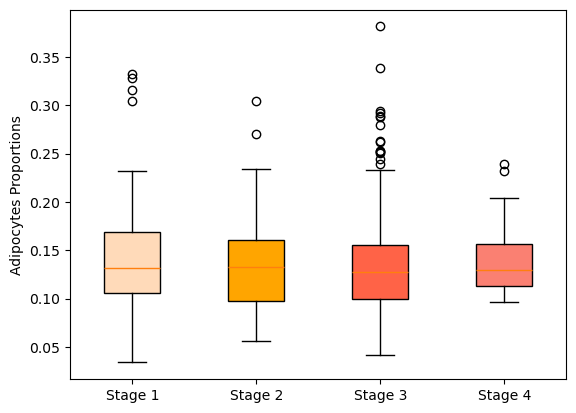

In [11]:
for cell in cell_types:

    print(cell)

    om = df[df.Stage == 1][cell]
    ov = df[df.Stage == 2][cell]
    ovft = df[df.Stage == 3][cell]
    ft = df[df.Stage == 4][cell]

    values = [om, ov, ovft, ft]

    fig, ax = plt.subplots()
    ax.set_ylabel(f"{cell} Proportions")

    bplot = ax.boxplot(
        values, patch_artist=True, tick_labels=labels  # fill with color
    )  # will be used to label x-ticks

    # fill with colors
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)

    plt.show()

In [12]:
df["StageAdv"] = (df["Stage"] >= 3).astype(
    int
)  # 0 = Early (I/II), 1 = Advanced (III/IV)

### And some exploratory analysis per cell type:

In [13]:
# ── if not already defined, create a 0 / 1 StageAdv column ───────────────
# 0 = Stage I–II   •   1 = Stage III–IV
if "StageAdv" not in df.columns:
    df["StageAdv"] = (df["Stage"] >= 3).astype(int)

for cell in cell_types:

    print(f"Analyzing {cell}...")
    # ── arcsine–sqrt transform for proportions ───────────────────────────────
    # raw vectors
    early_raw = df.loc[df.StageAdv == 0, cell]
    adv_raw = df.loc[df.StageAdv == 1, cell]

    # transformed for Welch t-test
    early = early_raw
    adv = adv_raw

    # Welch two-sample t-test (unequal variances)
    t_stat, p_val = ttest_ind(adv, early, equal_var=False, nan_policy="omit")
    print("\n")
    # ── results ──────────────────────────────────────────────────────────────
    print(f"Welch t-statistic = {t_stat:.3f}")
    print(f"p-value           = {p_val:.4f}")

    print("\nGroup means on the **raw** proportion scale:")
    print(f"  Early stage (n={len(early_raw)}):    {early_raw.mean():.3f}")
    print(f"  Advanced stage (n={len(adv_raw)}):   {adv_raw.mean():.3f}")
    print("\n")

Analyzing Plasma cells...


Welch t-statistic = -1.232
p-value           = 0.2213

Group means on the **raw** proportion scale:
  Early stage (n=87):    0.001
  Advanced stage (n=492):   0.000


Analyzing B cells...


Welch t-statistic = -2.764
p-value           = 0.0066

Group means on the **raw** proportion scale:
  Early stage (n=87):    0.100
  Advanced stage (n=492):   0.085


Analyzing Endothelial cells...


Welch t-statistic = -1.549
p-value           = 0.1242

Group means on the **raw** proportion scale:
  Early stage (n=87):    0.038
  Advanced stage (n=492):   0.033


Analyzing T cells...


Welch t-statistic = 0.022
p-value           = 0.9827

Group means on the **raw** proportion scale:
  Early stage (n=87):    0.001
  Advanced stage (n=492):   0.001


Analyzing Monocytes...


Welch t-statistic = 1.375
p-value           = 0.1707

Group means on the **raw** proportion scale:
  Early stage (n=87):    0.000
  Advanced stage (n=492):   0.001


Analyzing Fibroblasts...


Welch t-

### Now by group, as seen in paper.

In [14]:
## Which cell types to use
df["Immune"] = df[immune_cells].sum(axis=1)
df["Stromal"] = df[stromal_cells].sum(axis=1)
df["Epithelial"] = df[epi_cells].sum(axis=1)

df_stage = df.copy()
df_stage

,ID,Age,Event,Time_Yrs,Tissue,Stage,Race,BMI,AdjTx,Residual,...,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset,StageAdv,Immune,Stromal,Epithelial
ID,,,,,,,,,,,,,,,,,,,,,
40143,40143,63,1,8.739220,NaN,3,1,23.218229,1.0,4.0,...,3.408820e-86,2.396804e-02,1.848657e-50,0.0,0.113422,SchildkrautW,1,0.218528,5.741863e-02,0.610632
41377,41377,54,1,1.180014,NaN,3,1,17.428942,NaN,3.0,...,5.097006e-86,1.148229e-151,2.716906e-120,0.0,0.169611,SchildkrautW,1,0.096819,3.138082e-02,0.702189
41387,41387,55,1,11.983573,NaN,3,2,45.470350,1.0,2.0,...,3.169795e-58,6.457394e-02,9.868737e-88,0.0,0.064832,SchildkrautB,1,0.086715,1.228492e-01,0.725604
41391,41391,60,1,4.993840,NaN,3,1,31.340800,NaN,3.0,...,1.975079e-50,1.760802e-02,3.608451e-57,0.0,0.119373,SchildkrautW,1,0.107769,1.118747e-01,0.660983
41435,41435,59,1,4.057495,NaN,3,1,23.922658,NaN,NaN,...,2.022724e-88,5.507985e-03,3.092821e-03,0.0,0.110333,SchildkrautW,1,0.087462,6.225249e-02,0.739953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310266,310266,40,0,9.702186,Fallopian Tube,3,2,28.349557,NaN,NaN,...,2.991107e-53,1.842305e-02,3.506149e-04,0.0,0.097551,SchildkrautB,1,0.049467,7.507748e-02,0.777904
320012,320012,66,0,11.767760,NaN,3,2,37.677475,1.0,4.0,...,2.676690e-115,2.749868e-124,8.635726e-145,0.0,0.135411,SchildkrautB,1,0.093217,9.157968e-51,0.771372
320025,320025,60,1,6.827869,Other,3,2,38.740537,1.0,3.0,...,7.514971e-104,2.901155e-89,6.676818e-64,0.0,0.181209,SchildkrautB,1,0.134981,2.364402e-02,0.660166



=== Stage effect on macro fractions (Welch t, Bonferroni) ===


,Cell_type,Mean_Early,Mean_Adv,Difference,p_raw,p_bonf
1,Immune,0.1285,0.1050,-0.0235,0.0018,0.0072
2,Stromal,0.0742,0.0959,0.0216,0.0145,0.0579
0,Adipocytes,0.1419,0.1331,-0.0088,0.2268,0.9073
3,Epithelial,0.6554,0.6660,0.0106,0.4749,1.0000


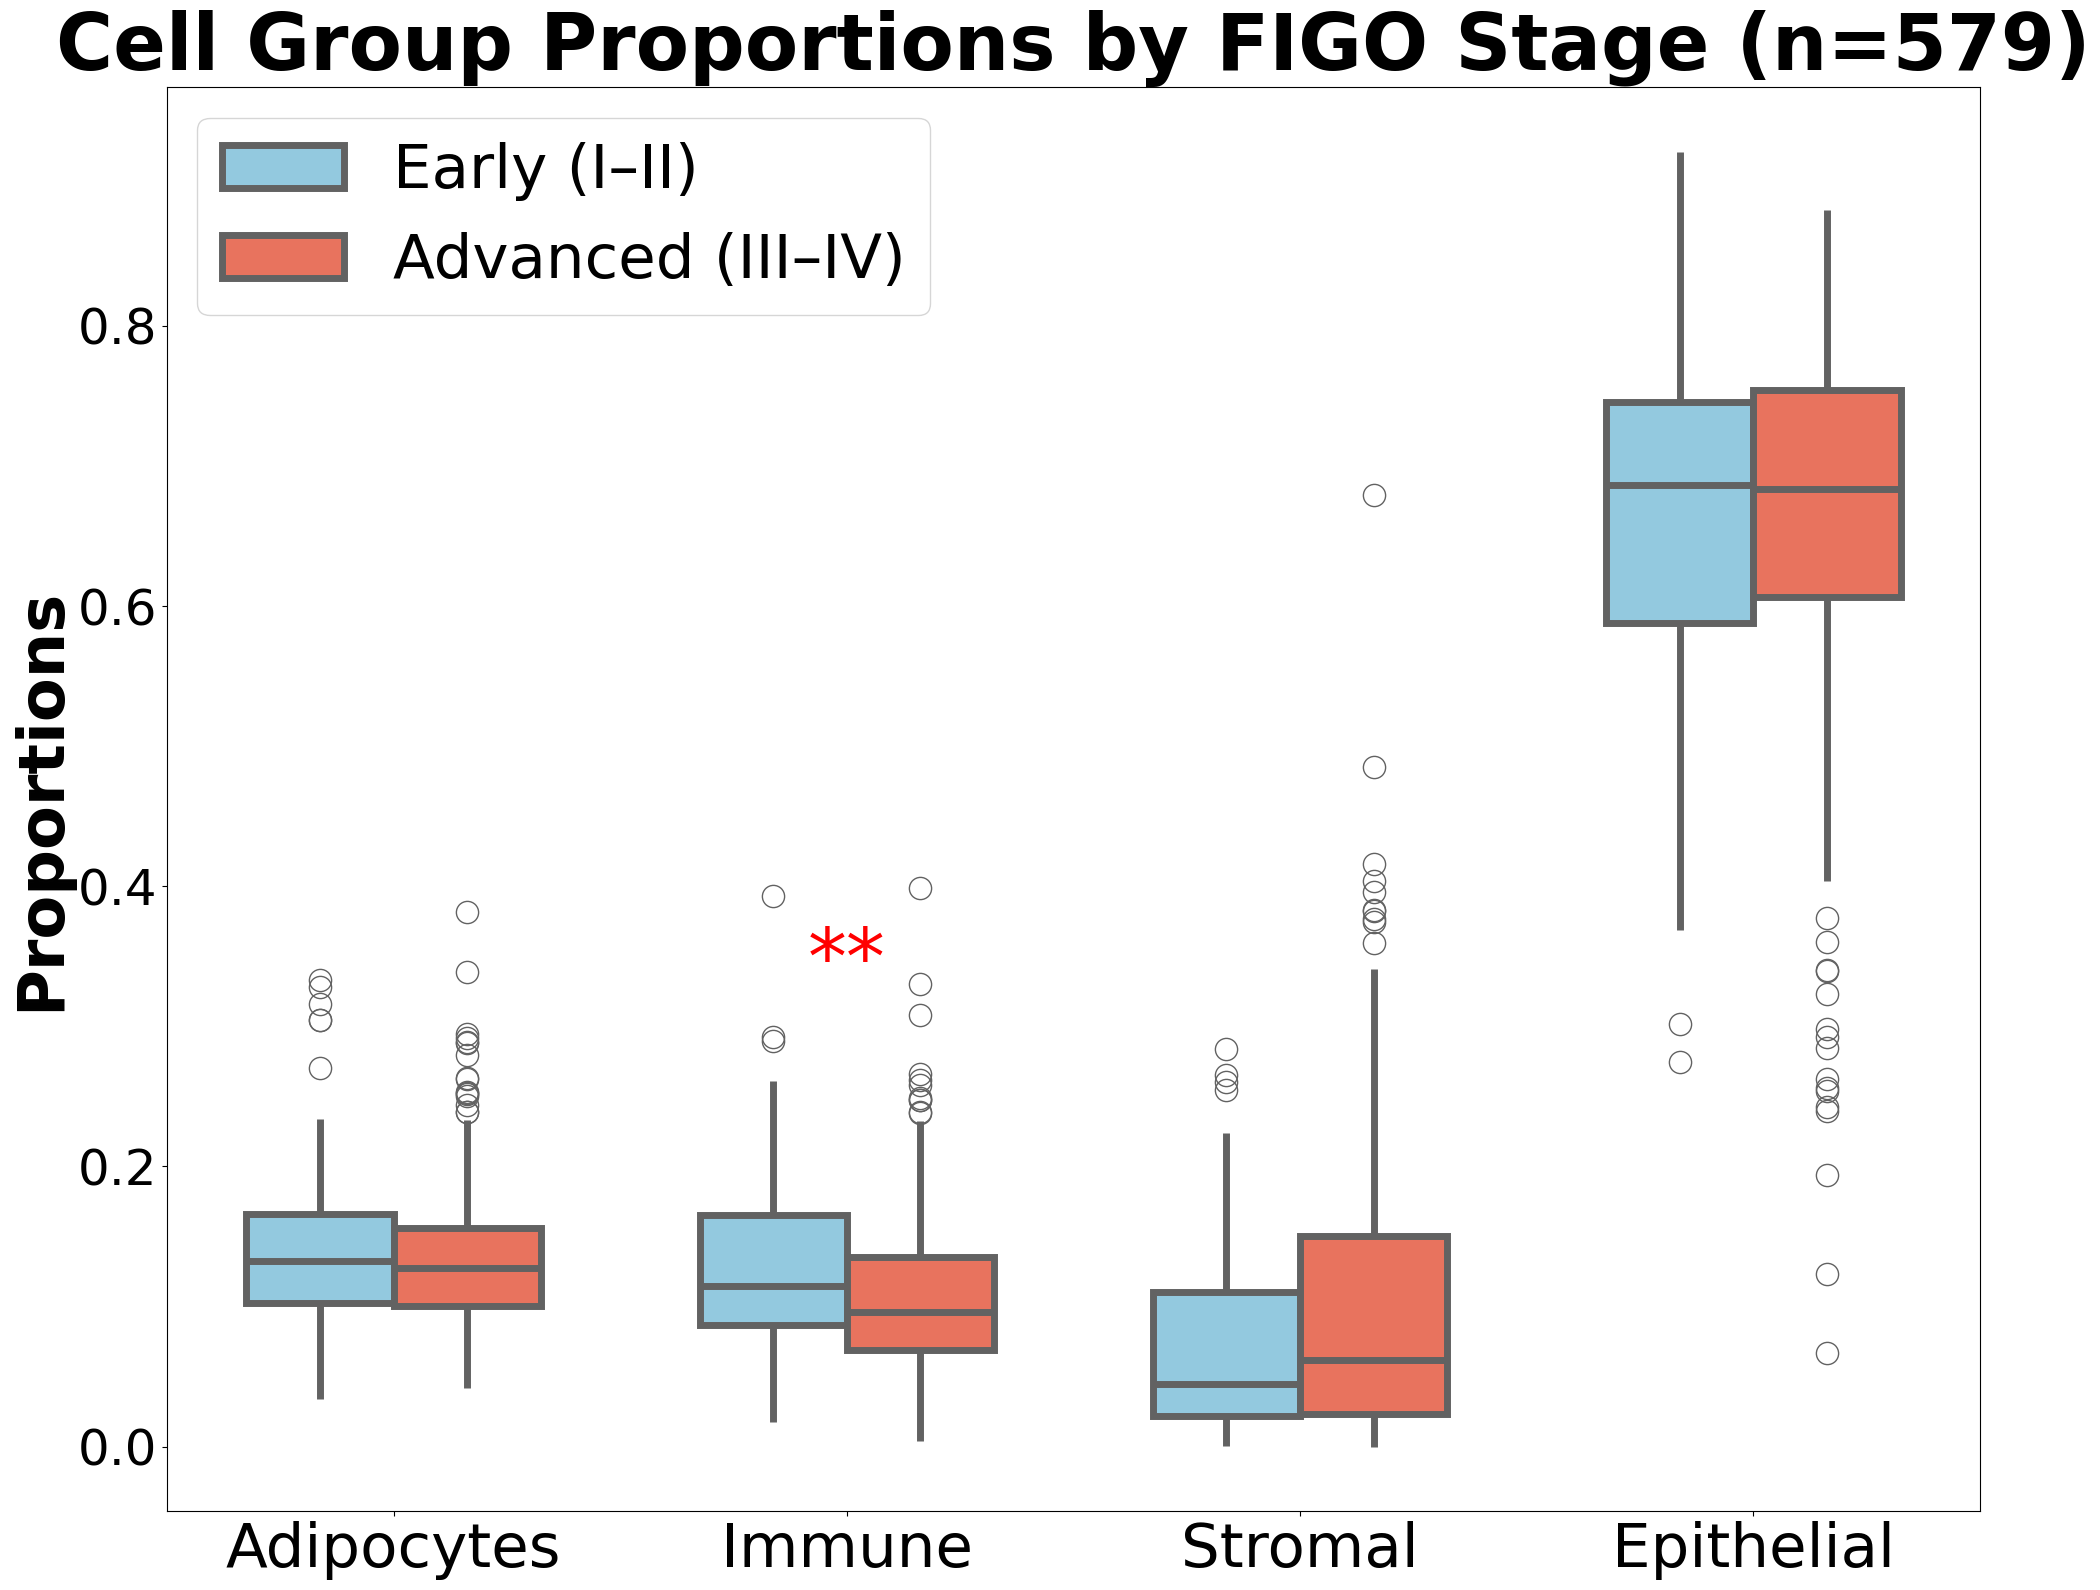

In [15]:
# ── Welch t-tests on raw fractions ─────────────────────────────────────────
records = []
for frac in fractions:
    early = df_stage.loc[df_stage.StageAdv == 0, frac]
    adv = df_stage.loc[df_stage.StageAdv == 1, frac]

    t_stat, p_raw = ttest_ind(adv, early, equal_var=False, nan_policy="omit")
    records.append(
        {
            "Cell_type": frac,
            "Mean_Early": early.mean(),
            "Mean_Adv": adv.mean(),
            "Difference": adv.mean() - early.mean(),
            "p_raw": p_raw,
        }
    )

res_stage = pd.DataFrame(records)
res_stage["p_bonf"] = multipletests(res_stage.p_raw, method="bonferroni")[1]
res_stage = res_stage.sort_values("p_bonf")

print("\n=== Stage effect on macro fractions (Welch t, Bonferroni) ===")
display(res_stage.round(4))

# ── Plot all three fractions, star significant ones ───────────────────────

long_all = df_stage[["StageAdv"] + fractions].melt(
    id_vars="StageAdv", var_name="Fraction", value_name="Prop"
)

palette = {0: "skyblue", 1: "tomato"}  # 0 = Early, 1 = Advanced
plt.figure(figsize=(20, 16))
ax = sns.boxplot(
    data=long_all,
    x="Fraction",
    y="Prop",
    hue="StageAdv",
    palette=palette,
    width=0.65,
    showcaps=False,
    fliersize=16,
    linewidth=5,
)

for i, frac in enumerate(fractions):
    star = hp.p_to_star(res_stage.loc[res_stage.Cell_type == frac, "p_bonf"].values[0])
    if star:
        y_max = long_all.loc[long_all.Fraction == frac, "Prop"].max() - 0.1
        ax.text(
            i, y_max + 0.02, star, ha="center", va="bottom", color="red", fontsize=56
        )

plt.ylabel("Proportions", fontsize=46, fontweight="bold")
plt.xlabel("", fontsize=46, fontweight="bold")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Early (I–II)", "Advanced (III–IV)"], loc="best", fontsize=44)

plt.title(
    f"Cell Group Proportions by FIGO Stage (n={df_stage.shape[0]})",
    fontsize=56,
    fontweight="bold",
)
plt.xticks(fontsize=44)
plt.yticks(fontsize=36)
plt.tight_layout()
plt.show()